Download the Dependencies

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/predictive_maintenance.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/predictive_maintenance.csv'

In [ ]:
df.sample(6)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
2784,2785,L49964,L,300.2,309.6,1430,52.7,47,0,No Failure
4072,4073,L51252,L,301.9,310.6,1610,33.4,87,0,No Failure
518,519,L47698,L,297.6,309.5,1924,20.6,37,0,No Failure
8310,8311,L55490,L,298.7,309.9,1465,39.7,72,0,No Failure
3322,3323,L50502,L,301.5,310.5,1351,52.9,116,0,No Failure
911,912,M15771,M,295.6,306.1,1490,42.7,171,0,No Failure


In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

One Should take note, that there are 2 targets, "Target" and "Failure type"

In [ ]:
df = df.drop(["UDI","Product ID"],axis=1)

NameError: name 'df' is not defined

Converting Temperature Scale to centigrade from kelvin and renaming the column necessarily

In [ ]:
df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [ ]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
9246,L,26.15,36.75,1862,27.0,172,0,No Failure,10.6
8301,M,26.55,37.95,1644,34.1,46,0,No Failure,11.4
1759,H,25.85,35.25,1606,35.2,195,0,No Failure,9.4
9085,H,24.95,35.75,1365,54.0,174,0,No Failure,10.8
2611,L,27.25,36.95,1957,22.1,55,0,No Failure,9.7


In [ ]:
display(df.shape)
display(df.size)

(10000, 9)

90000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.3+ KB


In [ ]:
df.describe().style.background_gradient(cmap="magma")

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


**Exploratory Data Analysis**

KDE plot

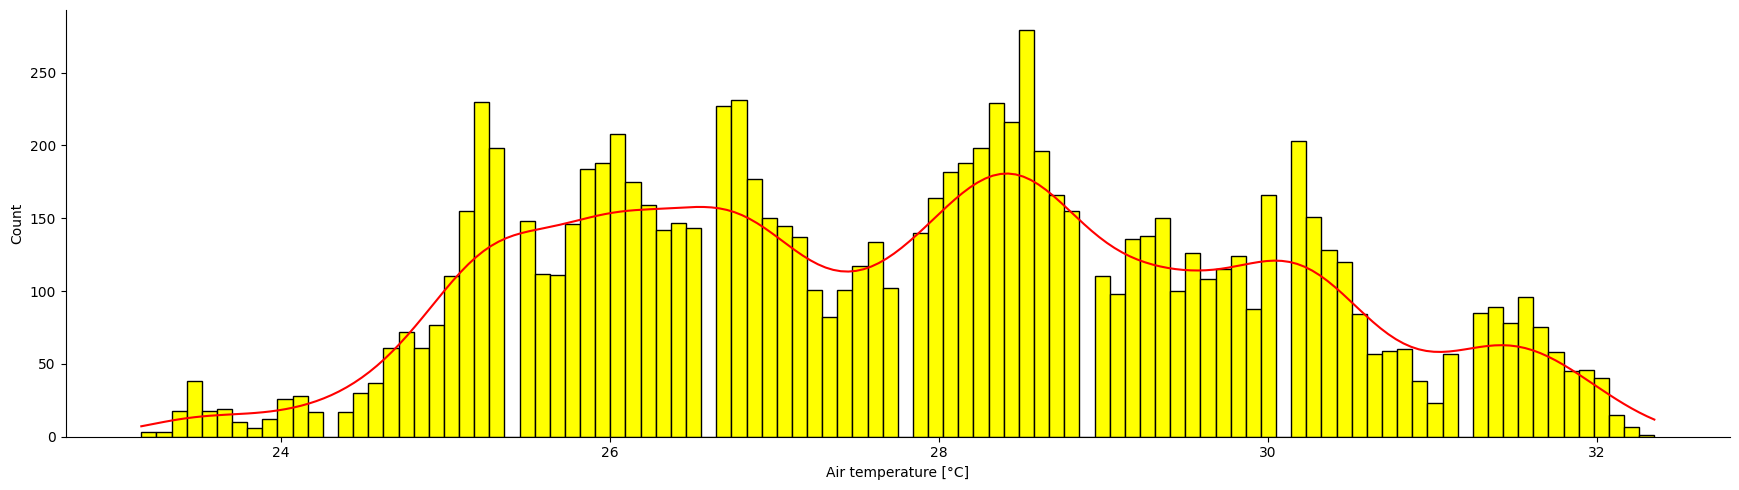

In [ ]:
sns.displot(data=df, x="Air temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

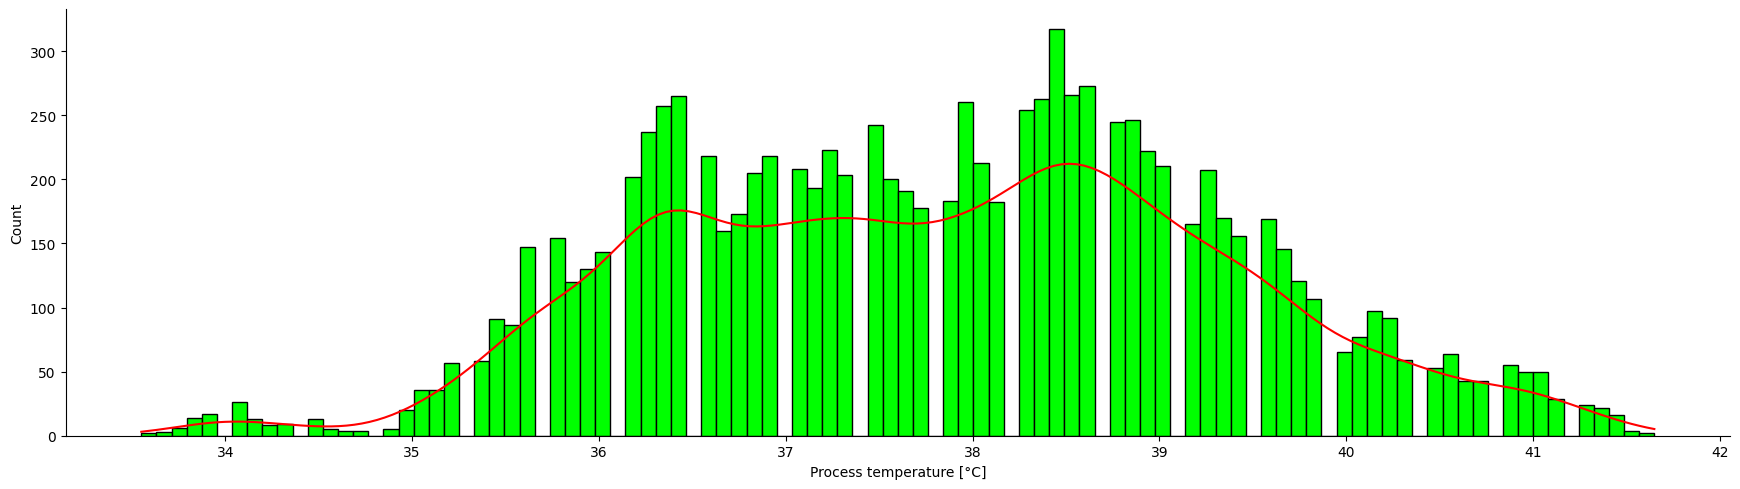

In [ ]:
sns.displot(data=df, x="Process temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "lime",height = 5, aspect = 3.5);

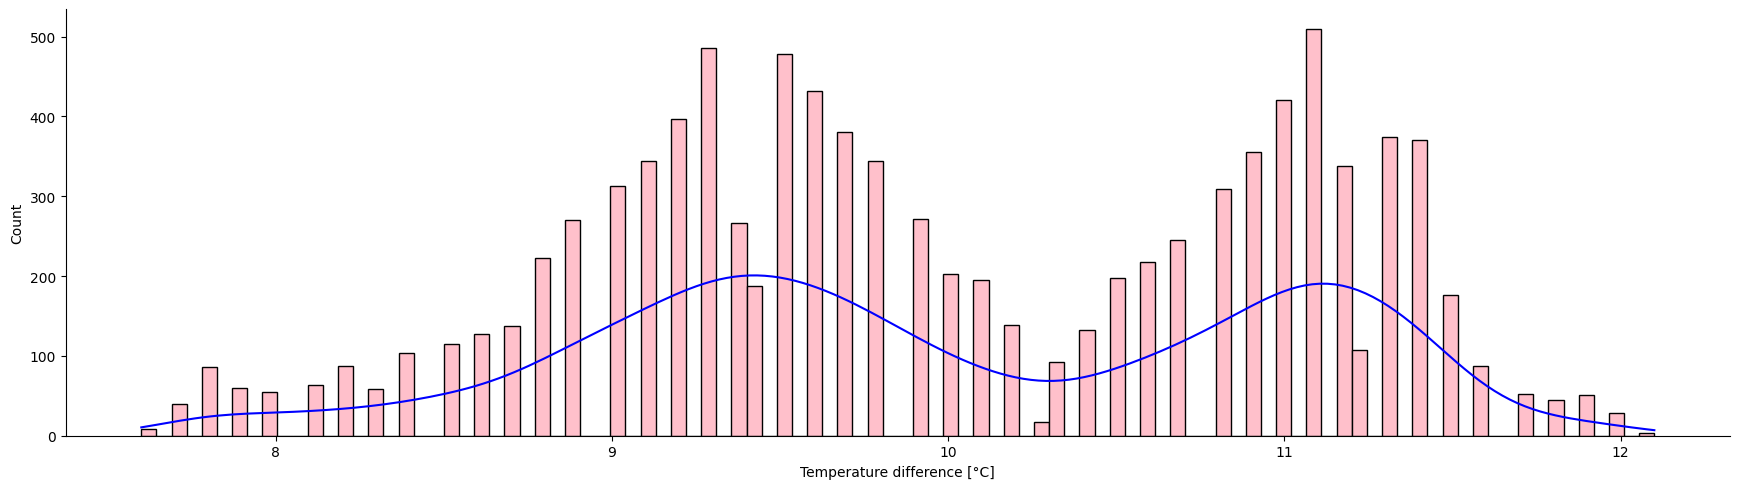

In [ ]:
sns.displot(data=df, x="Temperature difference [°C]", kde=True, bins = 100,color = "blue", facecolor = "Pink",height = 5, aspect = 3.5);

In [ ]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts())
    print("****"*8)

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
********************************
Target
0    9661
1     339
Name: count, dtype: int64
********************************
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
********************************


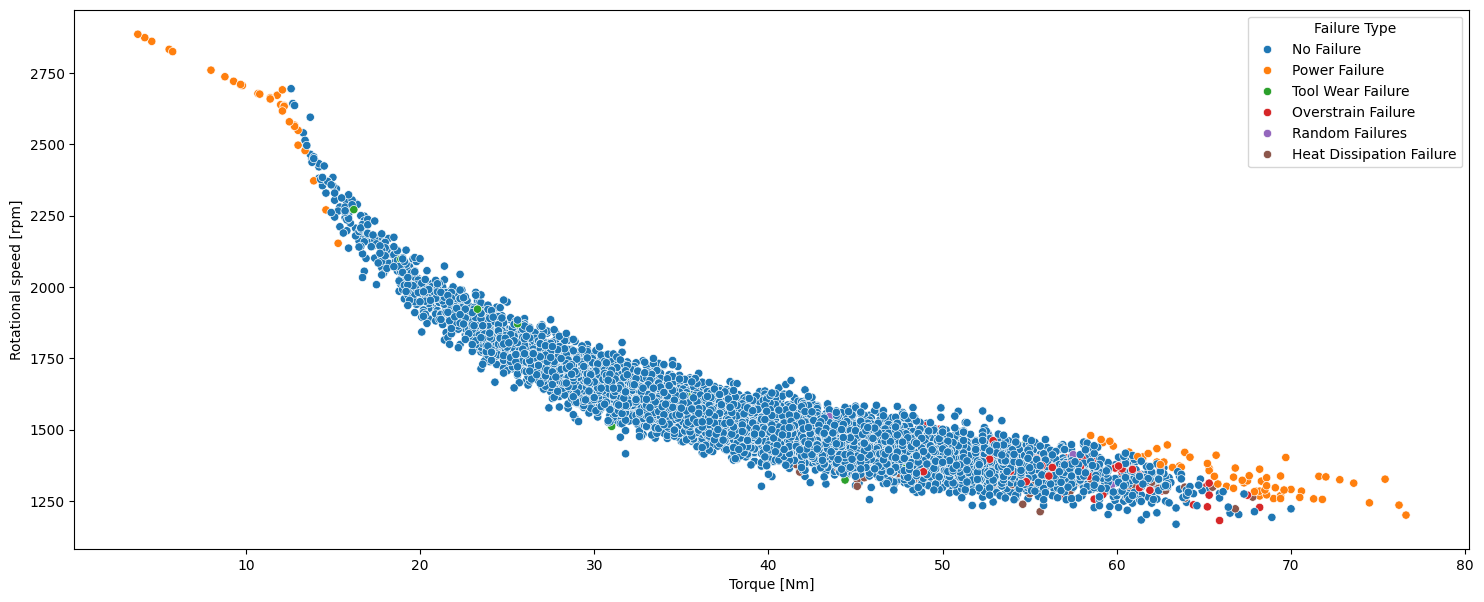

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");

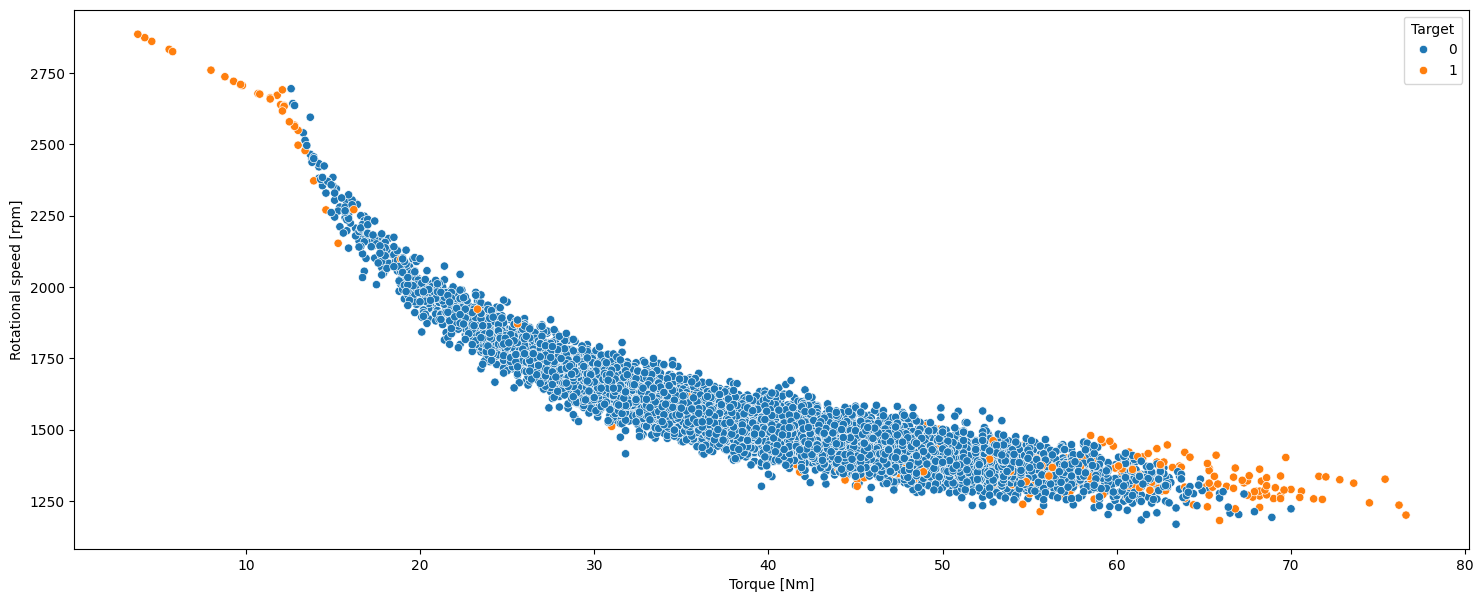

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");

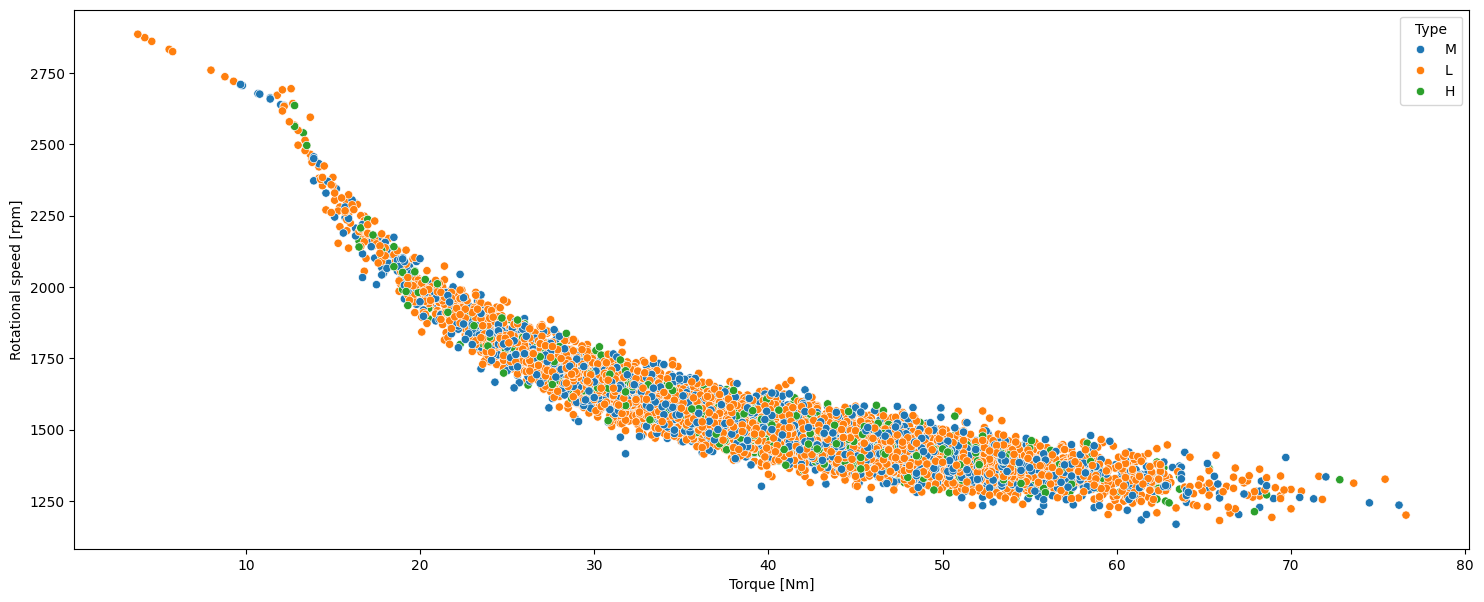

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

In [ ]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))

    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='pink')

    ax[0].axvline(x = df[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()

    sns.boxplot(x = df[feature], ax = ax[1],color='pink')

    plt.show()



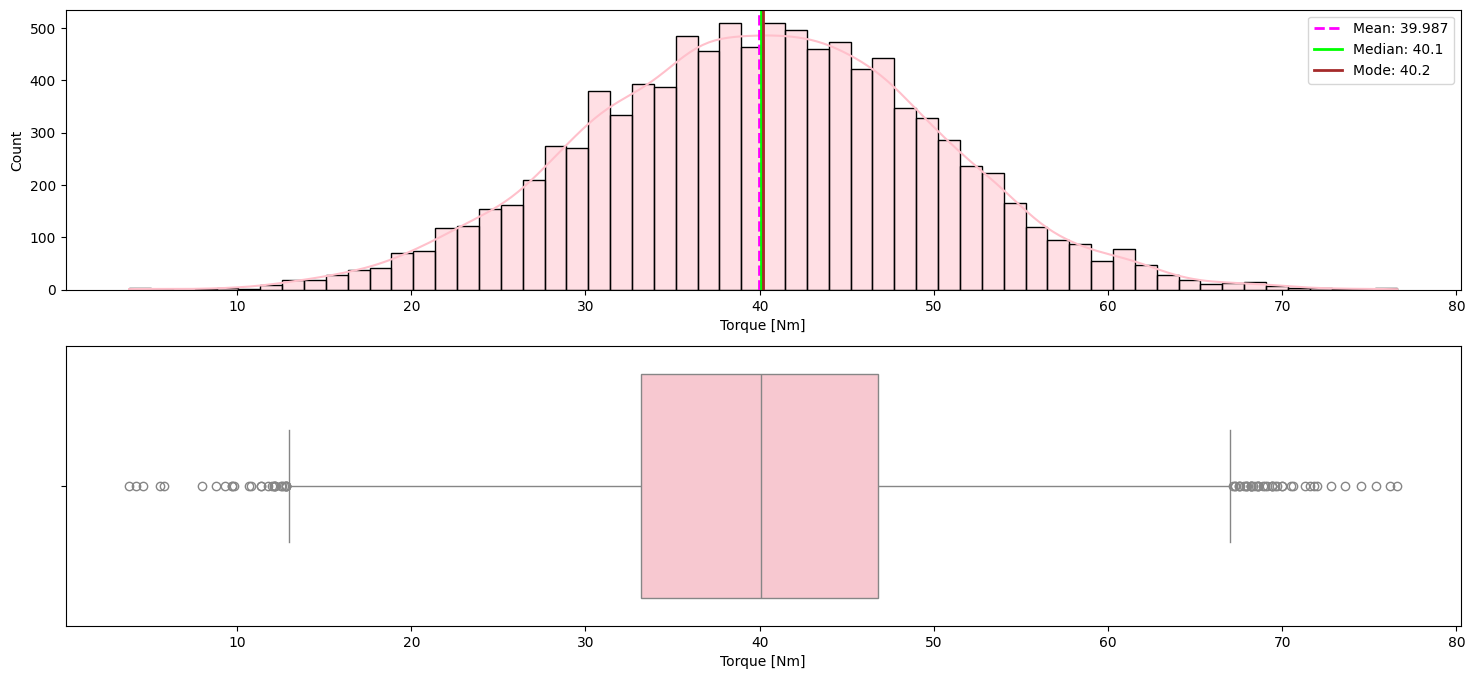

In [ ]:
plot_hist('Torque [Nm]')

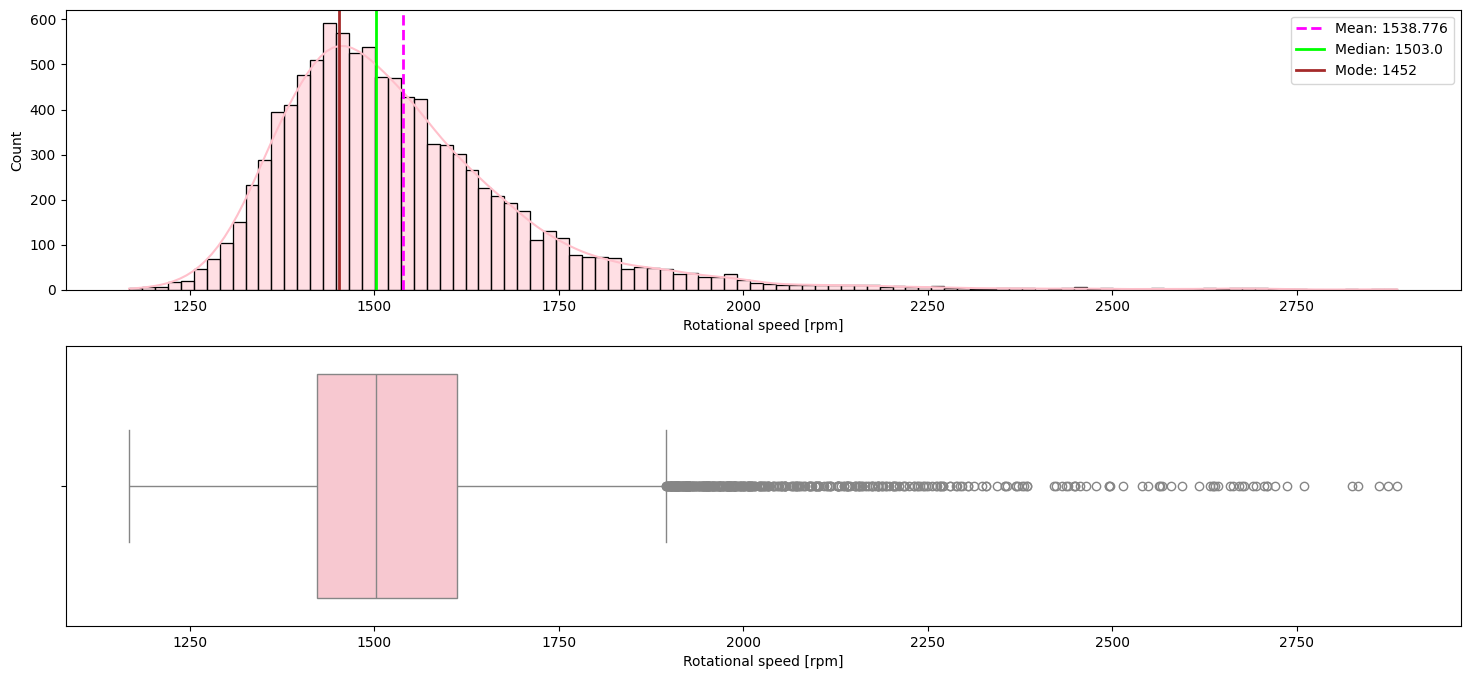

In [ ]:
plot_hist('Rotational speed [rpm]')

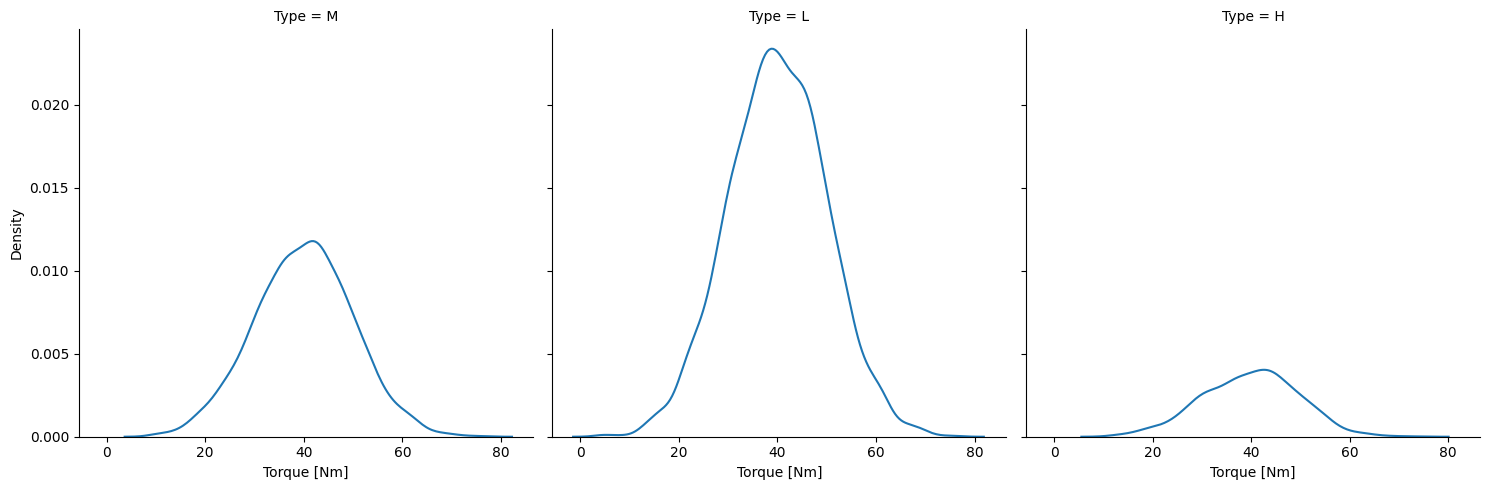

In [ ]:
sns.displot(data=df, x="Torque [Nm]", col="Type", kind="kde");

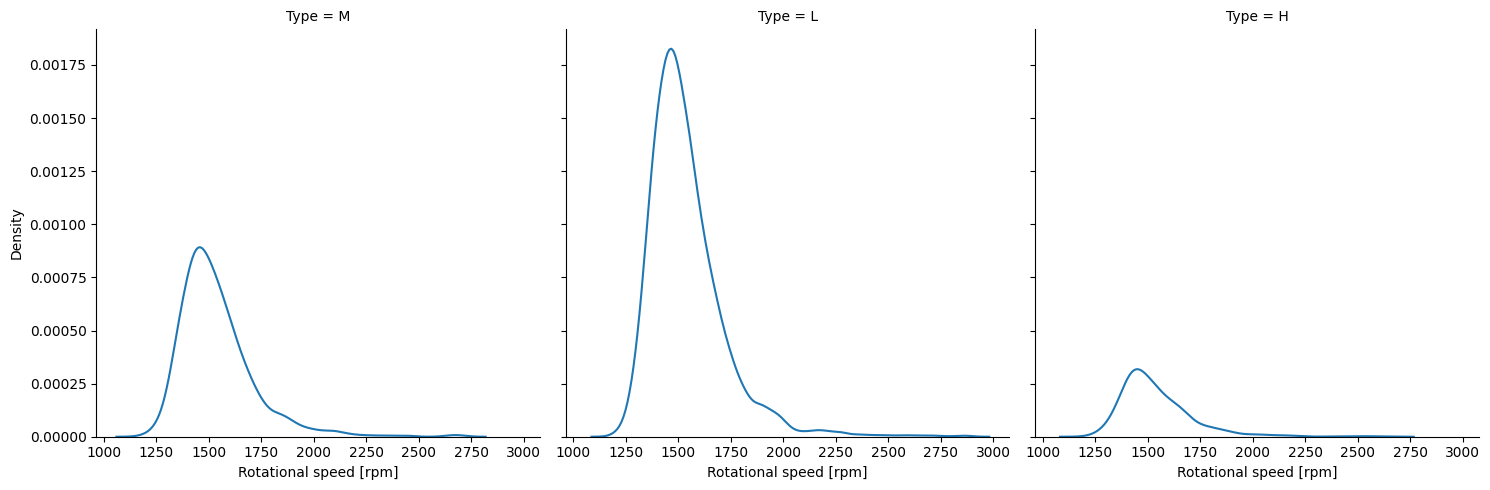

In [ ]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");

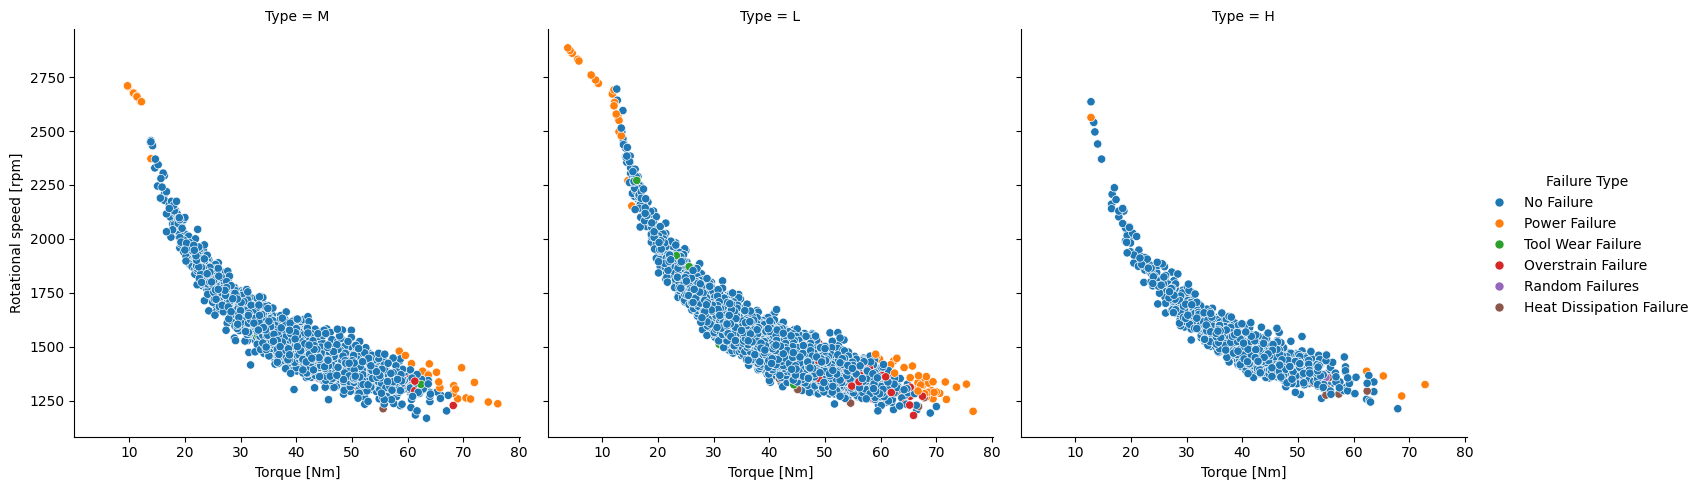

In [ ]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');

Encoding (Feature Selection)

In [ ]:
import category_encoders as ce
#### Ordinal Encoder
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,26.05,36.55,1408,46.3,3,0,1,10.5


In [ ]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [ ]:
X = df.drop(columns="Failure Type" , axis=1)
y = df["Failure Type"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [ ]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')


plt.savefig("class_distribution.png", dpi=300, bbox_inches='tight')


NameError: name 'plt' is not defined

**Models**


*   Logistic Regression
*   Decision Tree Classifier
*   Random Forest Classifier
*   SVM





Training Accuracy    : 96.74 %
Model Accuracy Score : 96.25 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       0.67      0.38      0.48        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.27      0.23      0.24      2000
weighted avg       0.93      0.96      0.95      2000

--------------------------------------------------------


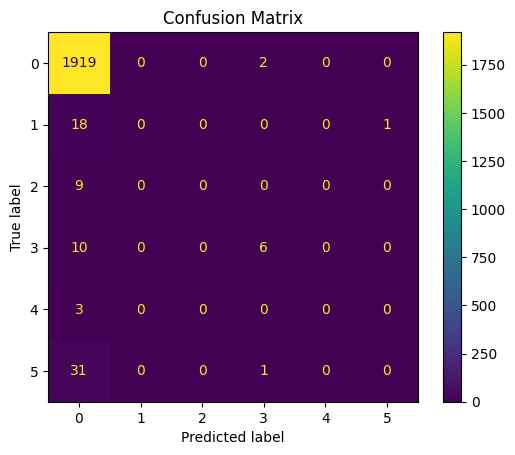

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.3 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.81      0.89      0.85        19
           2       0.90      1.00      0.95         9
           3       0.92      0.75      0.83        16
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        32

    accuracy                           0.99      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.99      0.99      0.99      2000

--------------------------------------------------------


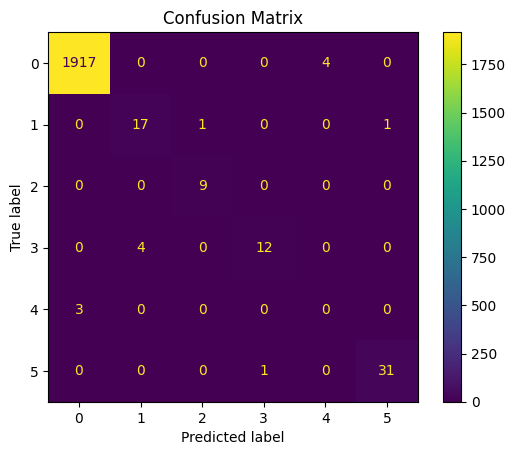

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
ConfusionMatrixDisplay.from_estimator(decision, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.7 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.95      0.95      0.95        19
           2       1.00      0.89      0.94         9
           3       0.94      1.00      0.97        16
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        32

    accuracy                           1.00      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       1.00      1.00      1.00      2000

--------------------------------------------------------


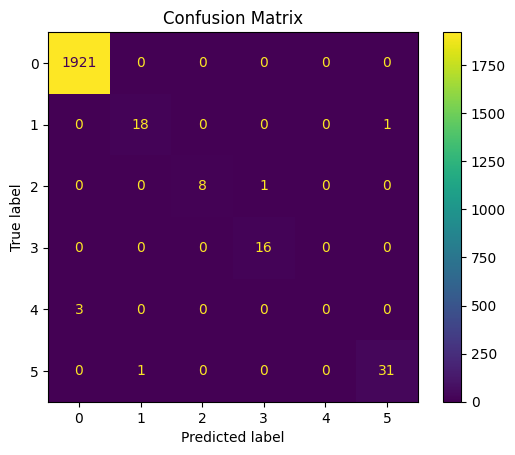

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

Training Accuracy    : 96.64 %
Model Accuracy Score : 96.05 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.16      0.17      0.16      2000
weighted avg       0.92      0.96      0.94      2000

--------------------------------------------------------


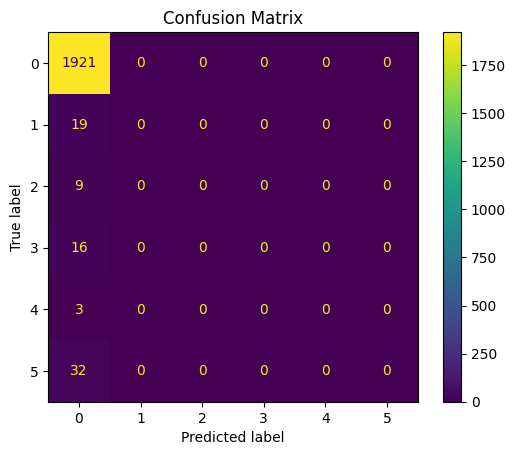

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree'
    ],

    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train],

    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy
    ]
})

In [ ]:
pd.set_option('display.precision', 2)
models.sort_values(by='Model Accuracy Score', ascending=False).style\
    .background_gradient(cmap='coolwarm')\
    .hide(axis="index")\
    .set_properties(**{
        'font-family': 'Lucida Calligraphy',
        'color': 'LightGreen',
    })


Model,Training Accuracy,Model Accuracy Score
Decision Tree,100.000000,99.700000
Random Forest,100.000000,99.300000
Support Vector Machines,96.740000,96.250000
Logistic Regression,96.640000,96.050000


Using SMOTE technique to tackle imbalance data

In [ ]:
# ─── 1. Install if needed ─────────────────────────────────────────────────────
!pip install imbalanced-learn

# ─── 2. Imports ────────────────────────────────────────────────────────────────
import numpy as np
import pandas as pd

from sklearn.model_selection     import train_test_split
from sklearn.compose             import ColumnTransformer
from sklearn.preprocessing       import StandardScaler
from sklearn.linear_model        import LogisticRegression
from sklearn.tree                import DecisionTreeClassifier
from sklearn.svm                 import SVC
from sklearn.metrics             import classification_report, ConfusionMatrixDisplay

from imblearn.pipeline           import Pipeline as ImbPipeline
from imblearn.over_sampling      import SMOTE

import matplotlib.pyplot as plt


# ─── 4. Identify numeric columns ───────────────────────────────────────────────




In [ ]:
num_feats = X_train.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
# ─── 5. Define your classifiers ────────────────────────────────────────────────
models = {
    "Logistic Regression": LogisticRegression(
        class_weight="balanced", max_iter=1000, random_state=21
    ),
    "Decision Tree": DecisionTreeClassifier(
        class_weight="balanced", random_state=21
    ),
    "Support Vector Machine": SVC(
        class_weight="balanced", probability=True, random_state=21
    ),
}


Logistic Regression
-------------------
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      1921
           1       0.95      1.00      0.97        19
           2       0.64      1.00      0.78         9
           3       1.00      0.88      0.93        16
           4       0.00      0.67      0.01         3
           5       1.00      0.91      0.95        32

    accuracy                           0.65      2000
   macro avg       0.77      0.85      0.74      2000
weighted avg       1.00      0.65      0.78      2000

Macro F1-score: 0.7376
Micro F1-score: 0.6495


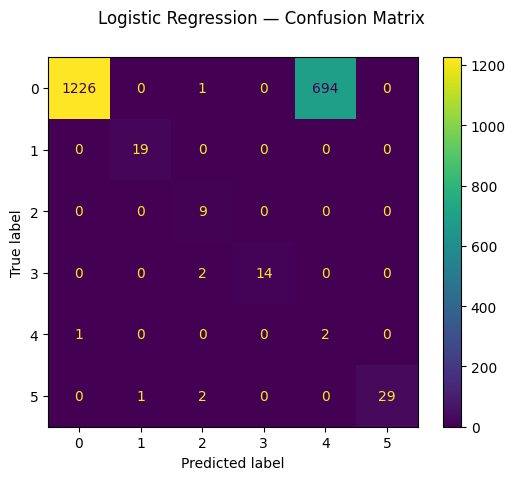

In [ ]:
# ─── Logistic Regression ───────────────────────────────────────────────────────
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt

pipe_lr = ImbPipeline([
    ("smote", SMOTE(random_state=21)),
    ("scaler", ColumnTransformer(
        [("num", StandardScaler(), num_feats)],
        remainder="passthrough"
    )),
    ("clf", LogisticRegression(
        class_weight="balanced", max_iter=1000, random_state=21
    )),
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

print("Logistic Regression")
print("-------------------")
print(classification_report(y_test, y_pred_lr))
print(f"Macro F1-score: {f1_score(y_test, y_pred_lr, average='macro'):.4f}")
print(f"Micro F1-score: {f1_score(y_test, y_pred_lr, average='micro'):.4f}")

disp_lr = ConfusionMatrixDisplay.from_estimator(pipe_lr, X_test, y_test)
disp_lr.figure_.suptitle("Logistic Regression — Confusion Matrix")
plt.show()


Decision Tree
-------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1921
           1       0.85      0.89      0.87        19
           2       0.89      0.89      0.89         9
           3       0.94      0.94      0.94        16
           4       0.00      0.00      0.00         3
           5       0.97      0.94      0.95        32

    accuracy                           0.98      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.99      0.98      0.99      2000

Macro F1-score: 0.7735
Micro F1-score: 0.9790


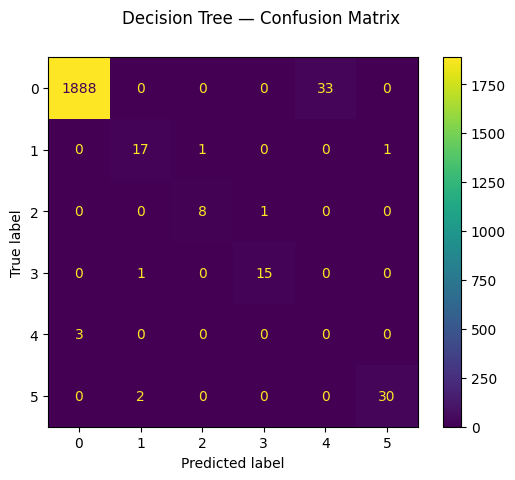

In [ ]:
# ─── Decision Tree ─────────────────────────────────────────────────────────────
from sklearn.tree import DecisionTreeClassifier

pipe_dt = ImbPipeline([
    ("smote", SMOTE(random_state=21)),
    ("scaler", ColumnTransformer(
        [("num", StandardScaler(), num_feats)],
        remainder="passthrough"
    )),
    ("clf", DecisionTreeClassifier(
        class_weight="balanced", random_state=21
    )),
])

pipe_dt.fit(X_train, y_train)
y_pred_dt = pipe_dt.predict(X_test)

print("Decision Tree")
print("-------------")
print(classification_report(y_test, y_pred_dt))
print(f"Macro F1-score: {f1_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"Micro F1-score: {f1_score(y_test, y_pred_dt, average='micro'):.4f}")

disp_dt = ConfusionMatrixDisplay.from_estimator(pipe_dt, X_test, y_test)
disp_dt.figure_.suptitle("Decision Tree — Confusion Matrix")
plt.show()


Support Vector Machine
----------------------
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1921
           1       0.95      0.95      0.95        19
           2       0.82      1.00      0.90         9
           3       1.00      1.00      1.00        16
           4       0.00      0.00      0.00         3
           5       0.97      0.94      0.95        32

    accuracy                           0.86      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.99      0.86      0.92      2000

Macro F1-score: 0.7866
Micro F1-score: 0.8560


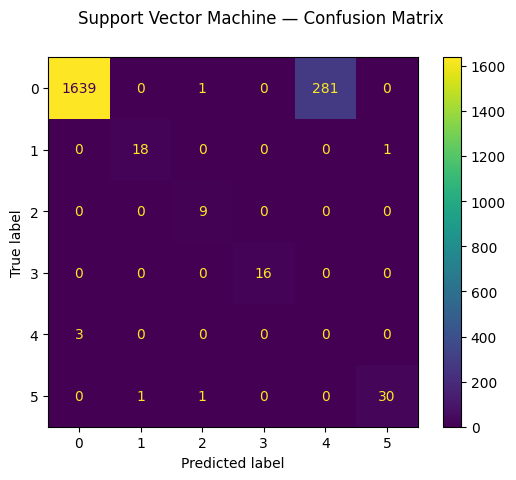

In [ ]:
# ─── Support Vector Machine ────────────────────────────────────────────────────
from sklearn.svm import SVC

pipe_svc = ImbPipeline([
    ("smote", SMOTE(random_state=21)),
    ("scaler", ColumnTransformer(
        [("num", StandardScaler(), num_feats)],
        remainder="passthrough"
    )),
    ("clf", SVC(
        class_weight="balanced", probability=True, random_state=21
    )),
])

pipe_svc.fit(X_train, y_train)
y_pred_svc = pipe_svc.predict(X_test)

print("Support Vector Machine")
print("----------------------")
print(classification_report(y_test, y_pred_svc))
print(f"Macro F1-score: {f1_score(y_test, y_pred_svc, average='macro'):.4f}")
print(f"Micro F1-score: {f1_score(y_test, y_pred_svc, average='micro'):.4f}")

disp_svc = ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test, y_test)
disp_svc.figure_.suptitle("Support Vector Machine — Confusion Matrix")
plt.show()


Random Forest
-------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1921
           1       0.86      0.95      0.90        19
           2       1.00      1.00      1.00         9
           3       1.00      0.94      0.97        16
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        32

    accuracy                           0.99      2000
   macro avg       0.80      0.81      0.81      2000
weighted avg       1.00      0.99      0.99      2000

Macro F1-score: 0.8055
Micro F1-score: 0.9920


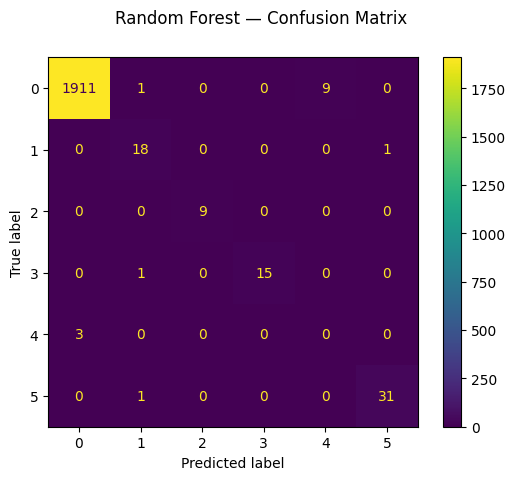

In [ ]:
# ─── Random Forest ─────────────────────────────────────────────────────────────
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt

pipe_rf = ImbPipeline([
    ("smote", SMOTE(random_state=21)),
    ("scaler", ColumnTransformer(
        [("num", StandardScaler(), num_feats)],
        remainder="passthrough"
    )),
    ("clf", RandomForestClassifier(
        n_estimators=100,
        class_weight="balanced",
        random_state=21
    )),
])

# Train
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)

# Evaluation
print("Random Forest")
print("-------------")
print(classification_report(y_test, y_pred_rf))
print(f"Macro F1-score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Micro F1-score: {f1_score(y_test, y_pred_rf, average='micro'):.4f}")

# Confusion matrix
disp_rf = ConfusionMatrixDisplay.from_estimator(pipe_rf, X_test, y_test)
disp_rf.figure_.suptitle("Random Forest — Confusion Matrix")
plt.show()


Comparison Of SMOTE and baseline models